In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os

In [2]:
telecom=pd.read_csv("training_data.csv")
telecom.head()

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,Los Angeles,Male,No,2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
3,Los Angeles,Female,No,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,49,Yes,Fiber optic,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes


In [3]:
telecom.shape

(7043, 13)

creating dummy variables for categorical variables. Here drop_first determines whether to get k-1 dummies out of k categorical levels by removing the first level.

In [12]:
X = telecom.drop('Churn_Yes',axis=1)
y = telecom['Churn_Yes']
# devide the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# LOGISTIC REGRESSION

train accuracy: 0.9004259850905219 
 test accuracy: 0.8147622427253371


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.70      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409



confusion matrix for logistic regression


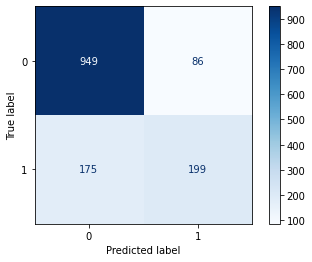

In [15]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test,cmap="Blues")

# SUPPORT VECTOR MACHINE

In [17]:
from sklearn.svm import LinearSVC

C:\Users\liwan\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train accuracy: 0.854632587859425 
 test accuracy: 0.7750177430801988


classification report for support vector machines 
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1035
           1       0.72      0.25      0.37       374

    accuracy                           0.78      1409
   macro avg       0.75      0.61      0.62      1409
weighted avg       0.77      0.78      0.73      1409



confusion matrix for support vector machines


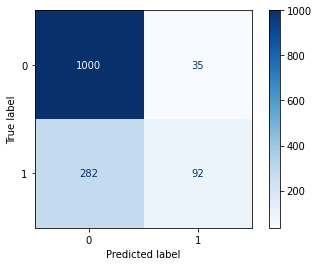

In [18]:
svm =LinearSVC()
model2=svm.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))
svmpred = svm.predict(x_test)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test,cmap="Blues")

# DECISION TREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier 



train accuracy: 1.0 
 test accuracy: 0.7799858055358411


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



confusion matrix for decision tree classifier


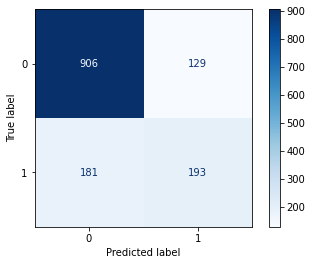

In [20]:
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test,cmap="Blues")

# RANDOM FOREST CLASSIFIER

In [21]:
from sklearn.ensemble import RandomForestClassifier

train accuracy: 1.0 
 test accuracy: 0.8133427963094393


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1035
           1       0.74      0.46      0.57       374

    accuracy                           0.81      1409
   macro avg       0.78      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



confusion matrix for random forest classifier


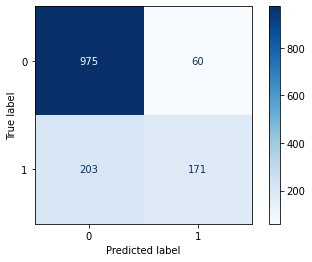

In [22]:
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test,cmap="Blues")